# **Importing Libraries**

In [40]:
# Basic Operation
import pandas as pd
import numpy as np

#EDA
import pandas as pd


# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud,STOPWORDS
from nltk import SnowballStemmer


from sklearn.model_selection import train_test_split # Split Data 
from imblearn.over_sampling import SMOTE # Handling Imbalanced

# Model Building
from sklearn.ensemble import RandomForestClassifier 
import tensorflow as tf
from scipy.sparse import csr_matrix
from tensorflow import keras
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score # Performance Metrics  

from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.neural_network import MLPClassifier # Ensembling

# Data Visualization 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
%matplotlib inline

In [41]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **Load The Data**

In [42]:
df=pd.read_csv('Tweets.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/US Airline Tweets/Tweets.csv')

In [43]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# **EDA Part**

In [44]:
# #EDA using Autoviz
# sweet_report = sv.analyze(pd.read_csv("/content/drive/MyDrive/US Airline Tweets/Tweets.csv"))

# #Saving results to HTML file
# sweet_report.show_html('sweet_report.html')

In [45]:
df.nunique()

tweet_id                        4493
airline_sentiment                  3
airline_sentiment_confidence     611
negativereason                    10
negativereason_confidence        863
airline                            3
airline_sentiment_gold             2
name                            2480
negativereason_gold                7
retweet_count                      7
text                            4475
tweet_coord                      306
tweet_created                   4472
tweet_location                  1155
user_timezone                     63
dtype: int64

In [46]:
df['tweet_created'] = pd.to_datetime(df['tweet_created']).dt.date

In [47]:
df['tweet_created'] = pd.to_datetime(df['tweet_created'])

In [48]:
df['tweet_created'].min()

Timestamp('2015-02-16 00:00:00')

In [49]:
df['tweet_created'].max()

Timestamp('2015-02-24 00:00:00')

In [50]:
df['tweet_created'].nunique()

9

In [51]:
numberoftweets = df.groupby('tweet_created').size()

In [52]:
numberoftweets

tweet_created
2015-02-16      2
2015-02-17    450
2015-02-18    466
2015-02-19    496
2015-02-20    596
2015-02-21    583
2015-02-22    756
2015-02-23    732
2015-02-24    411
dtype: int64

# **Checking Nan value in our dataset**

In [53]:
print("Percentage null or na values in df")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Percentage null or na values in df


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  35.32
negativereason_confidence       25.46
airline                          0.00
airline_sentiment_gold          99.82
name                             0.00
negativereason_gold             99.84
retweet_count                    0.00
text                             0.00
tweet_coord                     91.63
tweet_created                    0.02
tweet_location                  30.43
user_timezone                   32.92
dtype: float64

In [54]:
del df['tweet_coord']
del df['airline_sentiment_gold']
del df['negativereason_gold']
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada)


Reasons Of Negative Tweets : green
Customer Service Issue         772
Late Flight                    553
Can't Tell                     412
Lost Luggage                   277
Bad Flight                     245
Cancelled Flight               208
Flight Booking Problems        179
Flight Attendant Complaints    178
longlines                       55
Damaged Luggage                 27
Name: negativereason, dtype: int64


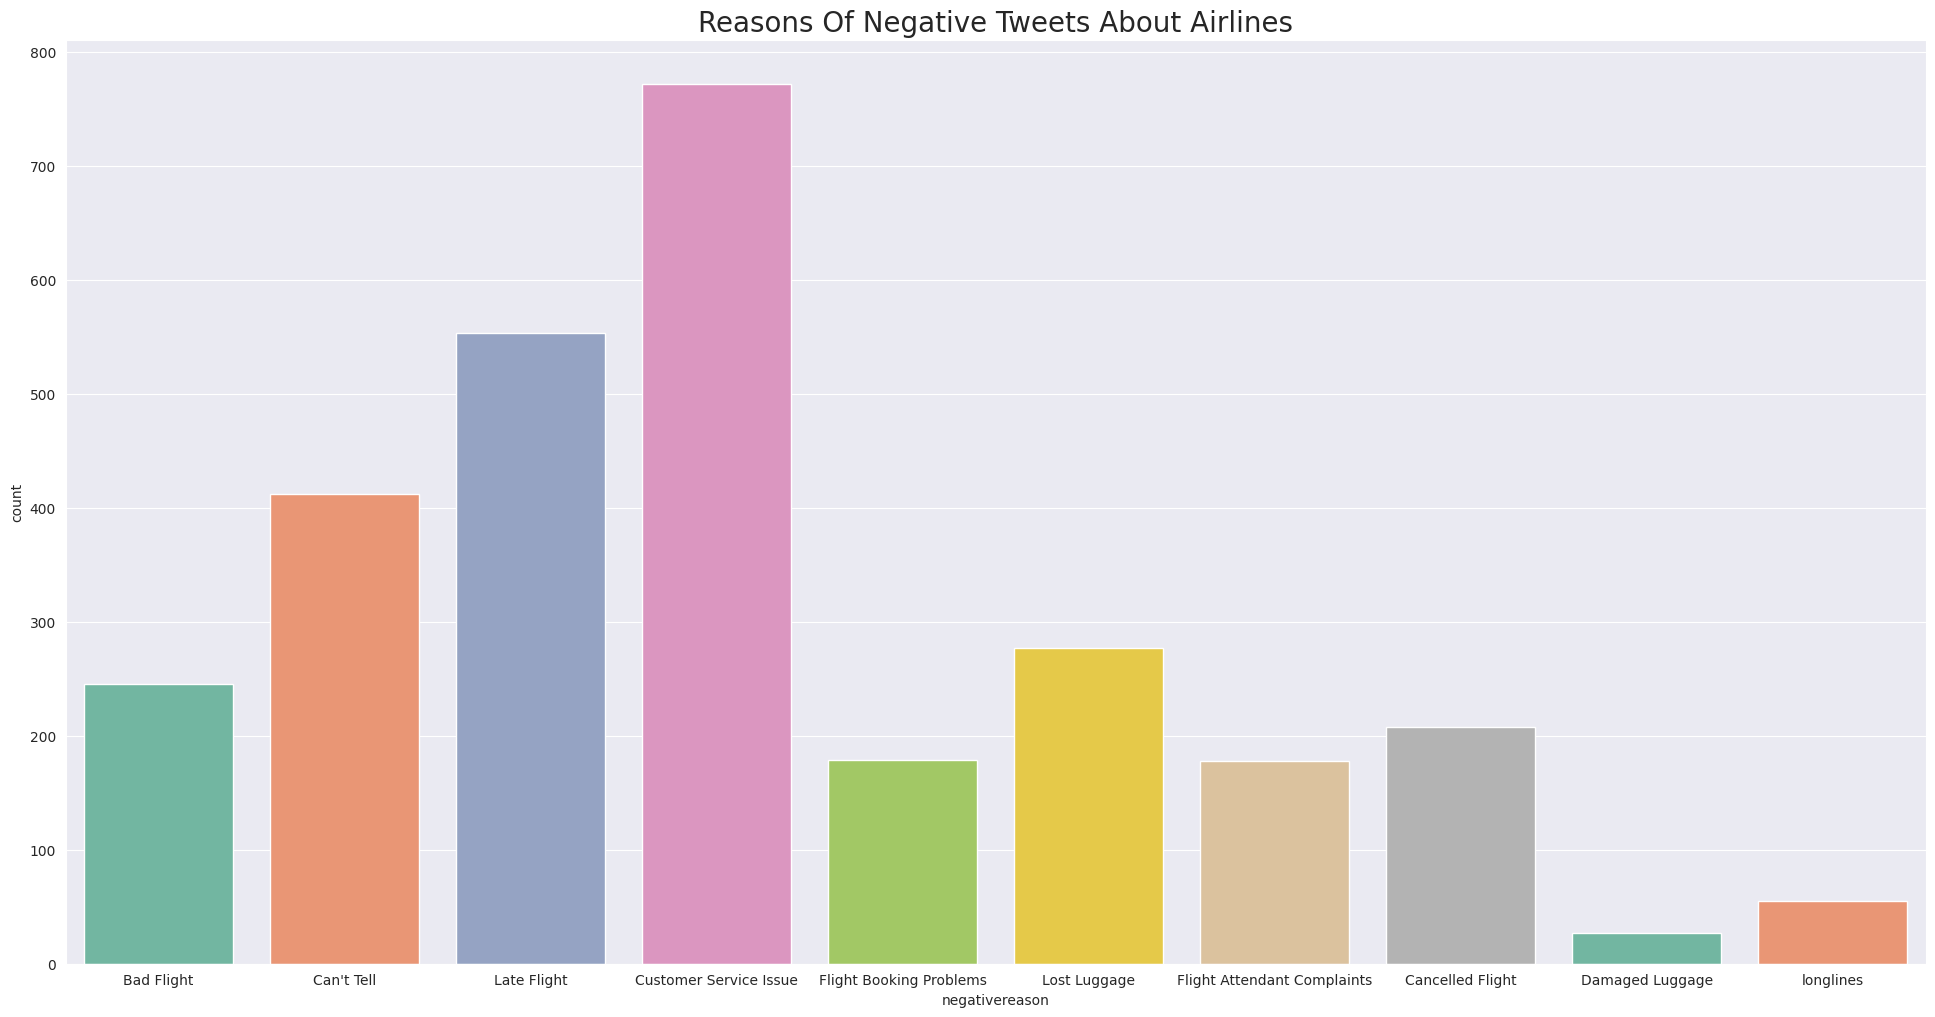

In [106]:
print('Reasons Of Negative Tweets :','green')
print(df.negativereason.value_counts())

plt.figure(figsize = (24, 12))
sns.countplot(x = 'negativereason', data = df, palette = 'Set2')
plt.title('Reasons Of Negative Tweets About Airlines', fontsize = 20)
plt.show()

# **Data Visualization**

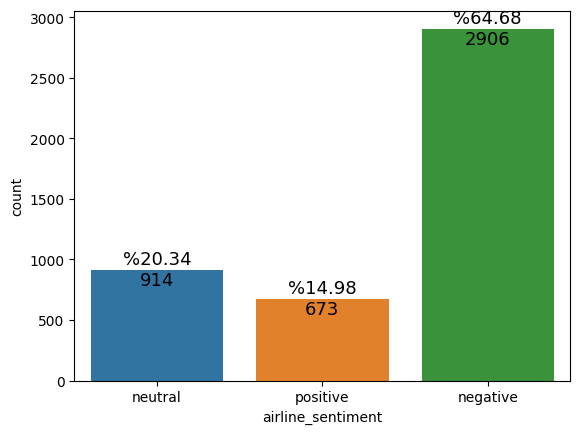

In [56]:
def labels(ax, df, xytext=(0, 0)):
    for bar in ax.patches: 
        ax.annotate('%{:.2f}\n{:.0f}'.format(100*bar.get_height()/len(df),bar.get_height()), (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                    size=13, xytext=xytext, 
                    textcoords='offset points')

ax = sns.countplot(data =df, x = "airline_sentiment");
labels(ax, df)
# inbalanced data

In [57]:
df['airline'].unique()

array(['Virgin America', 'United', 'Southwest'], dtype=object)

In [60]:
date = df.reset_index()
#convert the Date column to pandas datetime
date.tweet_created = pd.to_datetime(date.tweet_created)
#Reduce the dates in the date column to only the date and no time stamp using the 'dt.date' method
date.tweet_created = date.tweet_created.dt.date
date.tweet_created.head()
df = date
day_df = df.groupby(['tweet_created','airline','airline_sentiment']).size()
# day_df = day_df.reset_index()
day_df

tweet_created  airline         airline_sentiment
2015-02-16     United          negative               2
2015-02-17     United          negative             272
                               neutral               75
                               positive              49
               Virgin America  negative              12
                               neutral               21
                               positive              21
2015-02-18     United          negative             257
                               neutral               90
                               positive              59
               Virgin America  negative              19
                               neutral               21
                               positive              20
2015-02-19     United          negative             272
                               neutral               85
                               positive              69
               Virgin America  negative              24

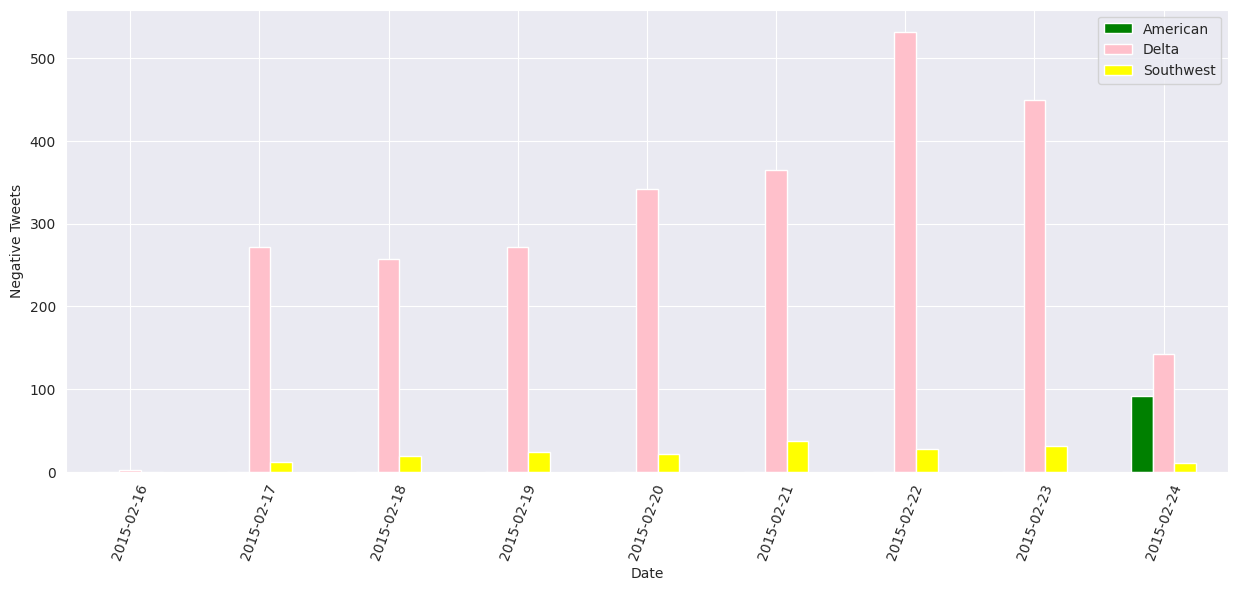

In [111]:
day_df = day_df.loc(axis=0)[:,:,'negative']

#groupby and plot data
ax2 = day_df.groupby(['tweet_created','airline']).sum().unstack().plot(kind = 'bar', color=['green', 'pink', 'yellow','blue','orange','purple'], figsize = (15,6), rot = 70)
labels = ['American','Delta','Southwest','US Airways','United','Virgin America']
ax2.legend(labels = labels)
ax2.set_xlabel('Date')
ax2.set_ylabel('Negative Tweets')
plt.show()

# **Word Cloud of Negative Sentiments**

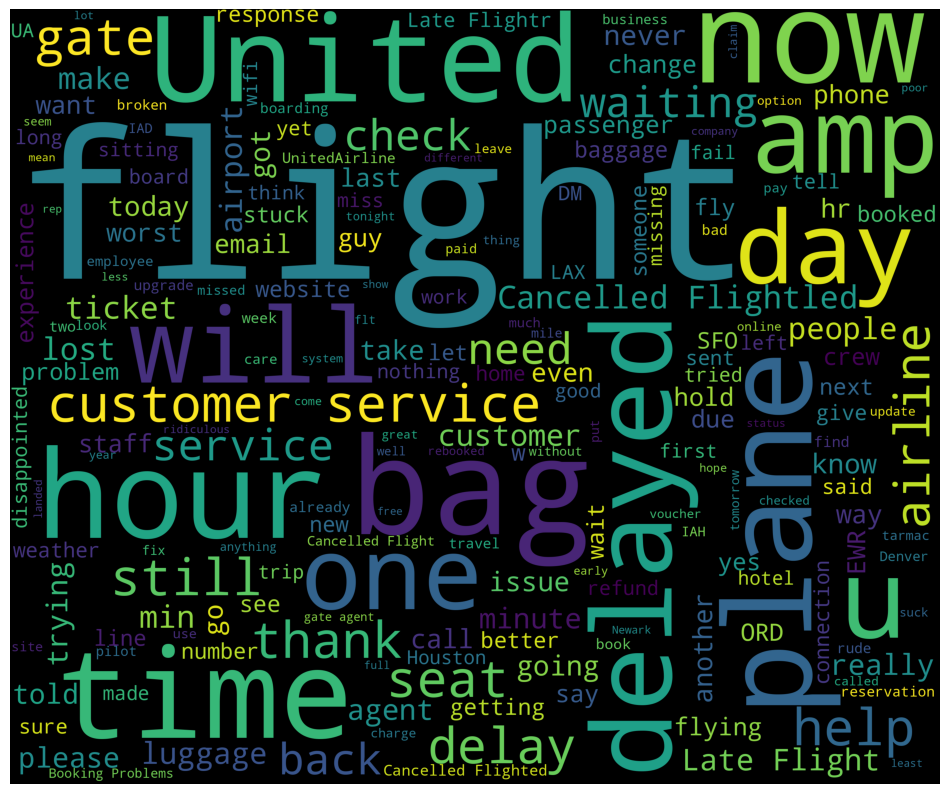

In [62]:
new_df=df[df['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# **Word Cloud of Positive Sentiments**

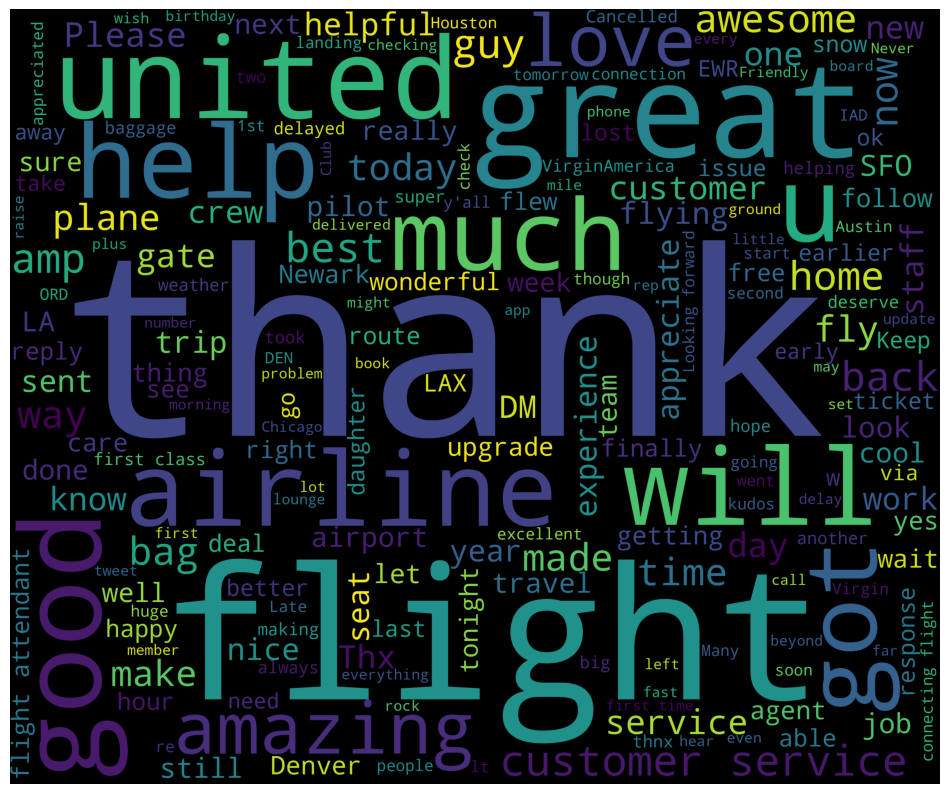

In [63]:
new_df=df[df['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# **Word Cloud of Neutral Sentiments**

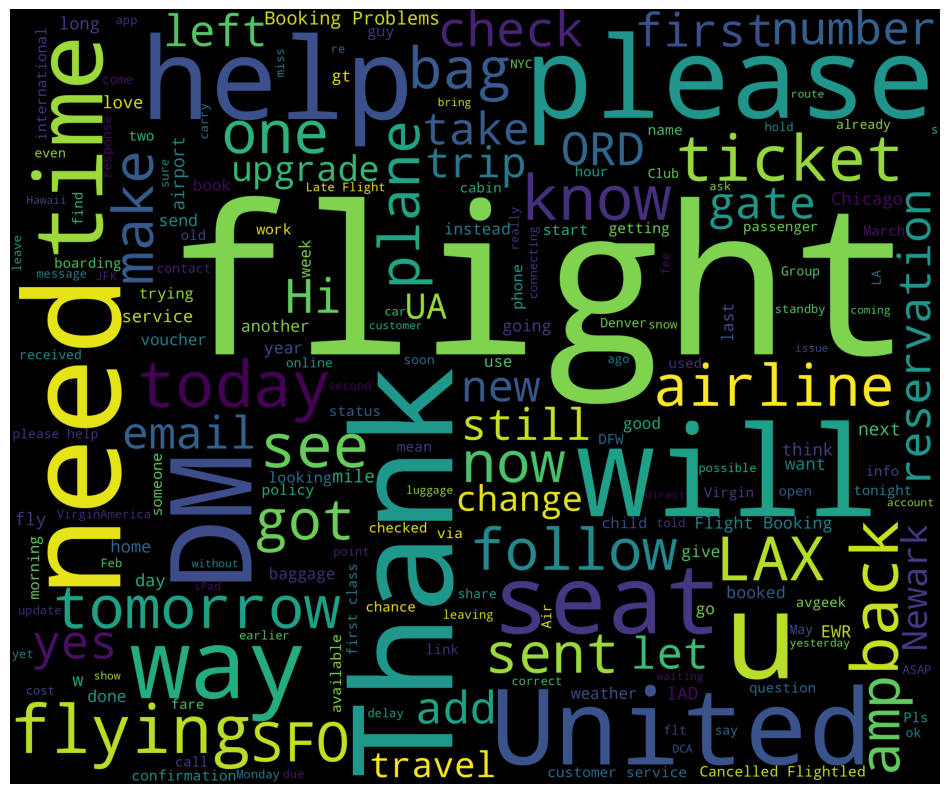

In [64]:
new_df=df[df['airline_sentiment']=='neutral']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# **Text Preprocessing and Cleaning**

In [65]:
# convert Sentiments to 0,1,2
def convert_Sentiment(sentiment):
    if  sentiment == "positive":
        return 2
    elif sentiment == "neutral":
        return 1
    elif sentiment == "negative":
        return 0

In [66]:
# Apply convert_Sentiment function
df.airline_sentiment = df.airline_sentiment.apply(lambda x : convert_Sentiment(x))

In [67]:
# Remove stop words
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text

# Remove url  
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# Remove punct
# def remove_punct(text):
#     table = str.maketrans('', '', string.punctuation)
#     return text.translate(table)

# Remove html 
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove @username
def remove_username(text):
    return re.sub('@[^\s]+','',text)

# Remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Decontraction text
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text

# Seperate alphanumeric
def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def cont_rep_char(text):
    tchr = text.group(0) 
    
    if len(tchr) > 1:
        return tchr[0:2] 

def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute

# combaine negative reason with  tweet (if exsist)
df['final_text'] = df['negativereason'].fillna('') + ' ' + df['text'] 

# Apply functions on tweets
df['final_text'] = df['final_text'].apply(lambda x : remove_username(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_url(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_emoji(x))
df['final_text'] = df['final_text'].apply(lambda x : decontraction(x))
df['final_text'] = df['final_text'].apply(lambda x : seperate_alphanumeric(x))
df['final_text'] = df['final_text'].apply(lambda x : unique_char(cont_rep_char,x))
df['final_text'] = df['final_text'].apply(lambda x : char(x))
df['final_text'] = df['final_text'].apply(lambda x : x.lower())
df['final_text'] = df['final_text'].apply(lambda x : remove_stopwords(x))

In [68]:
sbs = SnowballStemmer(language='english')

In [69]:
def stemmer(text):
    text = [sbs.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

df.final_text = df.final_text.apply(stemmer)

In [70]:
# result
df['final_text']

0                                                    said
1                           plus ad commerci experi tacki
2                    today must mean need take anoth trip
3       bad flight realli aggress blast obnoxi enterta...
4                            ca tell realli big bad thing
                              ...                        
4488                                    flight empti rude
4489    left ipad seat pocket file lost item report re...
4490               cancel flight flight msp cancel flight
4491    bad flight luv pleas stop overh plane second f...
4492                                                   th
Name: final_text, Length: 4493, dtype: object

In [71]:
X = df['final_text']
y = df['airline_sentiment']

**Apply TFIDF on cleaned tweets**

In [72]:
tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)

#**User tweet preprocessor**

In [73]:
def preprocessUserTweet(text):
    text = remove_username(text)
    text = remove_url(text)
    text = remove_emoji(text)
    text = decontraction(text)
    text = seperate_alphanumeric(text)
    text = unique_char(cont_rep_char,text)
    text = char(text)
    text = text.lower()
    text = remove_stopwords(text)
    text = stemmer(text)
    vector = tfid.transform([text])

    return vector

#**Handling Imbalance**

In [74]:
# Handling imbalanced using SMOTE
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,y)

# **Split data into train and test**

In [75]:
x_train , x_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.25,random_state=3)
# from sklearn.model_selection import train_test_split

# # Split the original data into training and test sets
# x_train, x_test, y_train, y_test = train_test_split(x_sm , y_sm, test_size=0.2, random_state=42)

# # Split the training set into training and validation sets
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

# # Print the shapes of the resulting data subsets
# print("Training set shape:", x_train.shape, y_train.shape)
# print("Validation set shape:", x_val.shape, y_val.shape)
# print("Test set shape:", x_test.shape, y_test.shape)


# **Modelling**



# 1.Random Forest Classifier

In [76]:
model = RandomForestClassifier()
model.fit(x_train,y_train)
model_prediction =  model.predict(x_test)
rf_acc = accuracy_score(model_prediction,y_test)

In [77]:
rf_cr = classification_report(y_test, model_prediction)

# 2. SVM


In [78]:
svm = SVC()
svm.fit(x_train,y_train)
svm_prediction =  svm.predict(x_test)
svm_acc = accuracy_score(svm_prediction,y_test)

In [85]:
svm_cr = classification_report(y_test, svm_prediction)

# 3. XGB Classfier

In [86]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
xgb_prediction =  xgb.predict(x_test)
xgbc_acc = accuracy_score(xgb_prediction,y_test)

In [87]:
xgbc_cr = classification_report(y_test, xgb_prediction)

# Comparing the 3 Individual Models

In [88]:
print("Accuracy:- ")
print("\t 1. Random Forest:\t ", rf_acc)
print("\t 2. SVM:\t\t ", svm_acc)
print("\t 3. XGB Classifier:\t ", xgbc_acc)

Accuracy:- 
	 1. Random Forest:	  0.9541284403669725
	 2. SVM:		  0.9568807339449541
	 3. XGB Classifier:	  0.944954128440367


In [89]:
print("Random Forest Classification Report:\n----------------------\n", rf_cr)
print("SVM Classification Report:\n----------------------\n", svm_cr)
print("XGB Classifier Classification Report:\n----------------------\n", xgbc_cr)

Random Forest Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       718
           1       0.94      0.93      0.94       739
           2       0.95      0.95      0.95       723

    accuracy                           0.95      2180
   macro avg       0.95      0.95      0.95      2180
weighted avg       0.95      0.95      0.95      2180

SVM Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       718
           1       0.93      0.95      0.94       739
           2       0.97      0.92      0.95       723

    accuracy                           0.96      2180
   macro avg       0.96      0.96      0.96      2180
weighted avg       0.96      0.96      0.96      2180

XGB Classifier Classification Report:
----------------------
               precision    recall  f1-score   support

         

# Using Ensemble Learning

In [90]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Initialize the individual models
xgb = XGBClassifier()
svm = SVC(probability=True)
rf = RandomForestClassifier()

# Train the individual models
rf.fit(x_train, y_train)
svm.fit(x_train, y_train)
xgb.fit(x_train, y_train)

# Use the individual models to make predictions on the test set
rf_pred = rf.predict_proba(x_test)
svm_pred = svm.predict_proba(x_test)
xgb_pred = xgb.predict_proba(x_test)

# Concatenate the predictions to form the new feature matrix
new_x_train = np.concatenate((rf.predict_proba(x_train), svm.predict_proba(x_train), xgb.predict_proba(x_train)), axis=1)
new_x_test = np.concatenate((rf_pred, svm_pred, xgb_pred), axis=1)



In [91]:
# Train a neural network to predict the final output using the concatenated predictions
nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42, verbose=True, validation_fraction=0.1, early_stopping=True)
nn.fit(new_x_train, y_train)


Iteration 1, loss = 0.88919673
Validation score: 0.990826
Iteration 2, loss = 0.46418397
Validation score: 0.990826
Iteration 3, loss = 0.21947730
Validation score: 0.992355
Iteration 4, loss = 0.11284742
Validation score: 0.992355
Iteration 5, loss = 0.07097296
Validation score: 0.993884
Iteration 6, loss = 0.05277356
Validation score: 0.995413
Iteration 7, loss = 0.04369483
Validation score: 0.995413
Iteration 8, loss = 0.03847205
Validation score: 0.996942
Iteration 9, loss = 0.03509539
Validation score: 0.996942
Iteration 10, loss = 0.03273084
Validation score: 0.998471
Iteration 11, loss = 0.03100146
Validation score: 1.000000
Iteration 12, loss = 0.02949332
Validation score: 1.000000
Iteration 13, loss = 0.02830510
Validation score: 1.000000
Iteration 14, loss = 0.02735628
Validation score: 1.000000
Iteration 15, loss = 0.02653073
Validation score: 1.000000
Iteration 16, loss = 0.02581201
Validation score: 1.000000
Iteration 17, loss = 0.02527855
Validation score: 1.000000
Iterat

MLPClassifier(early_stopping=True, max_iter=1000, random_state=42, verbose=True)

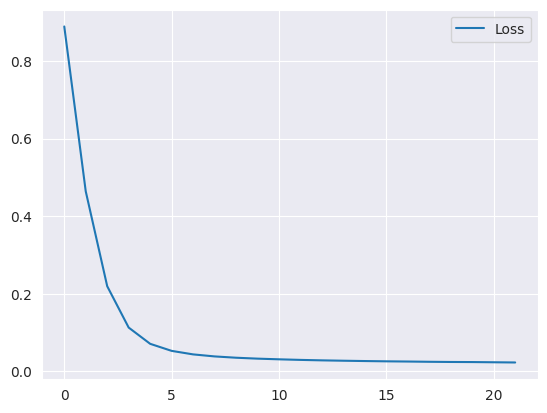

In [92]:
# Evaluate the final model on the test set
loss_curve = nn.loss_curve_
train_accuracies = []
test_accuracies = []
for i in range(len(loss_curve)):
    train_accuracy = nn.score(new_x_train, y_train)
    test_accuracy = nn.score(new_x_test, y_test)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the learning curves with seaborn
sns.set_style('darkgrid')
plt.figure()
plt.plot(loss_curve, label='Loss')
plt.legend()
plt.show()


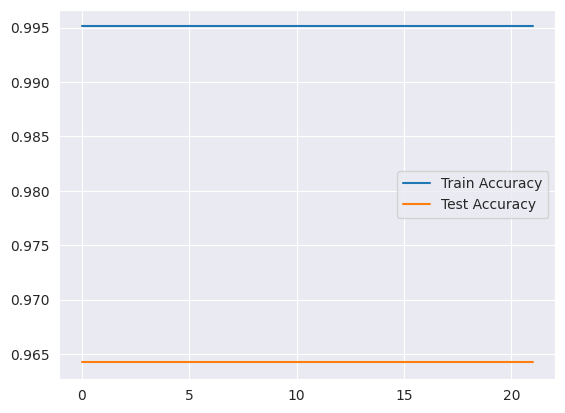

In [93]:
# Plot the learning curves with seaborn
sns.set_style('darkgrid')
plt.figure()
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.legend()
plt.show()

# Comapring the Merged and Individual Models

In [94]:
print("Accuracy:- ")
print("\t 1. Random Forest:\t ", rf_acc)
print("\t 2. SVM:\t\t ", svm_acc)
print("\t 3. XGB Classifier:\t ", xgbc_acc)
print("\t 4. Merged Ensemble:\t ", test_accuracy)

Accuracy:- 
	 1. Random Forest:	  0.9541284403669725
	 2. SVM:		  0.9568807339449541
	 3. XGB Classifier:	  0.944954128440367
	 4. Merged Ensemble:	  0.9642201834862385


# **Confusion Matrix**

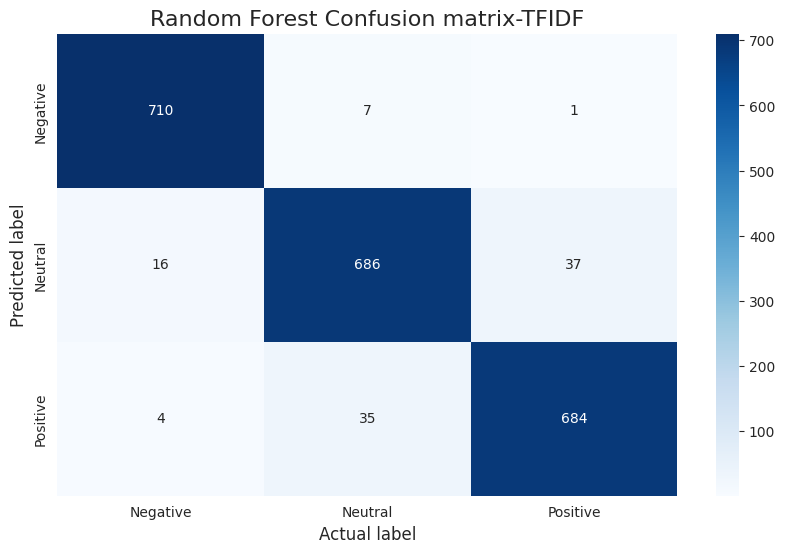

In [97]:
rf_cm = confusion_matrix(y_test,model_prediction)

# plot confusion matrix 
plt.figure(figsize=(10,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(rf_cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Random Forest Confusion matrix-TFIDF', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

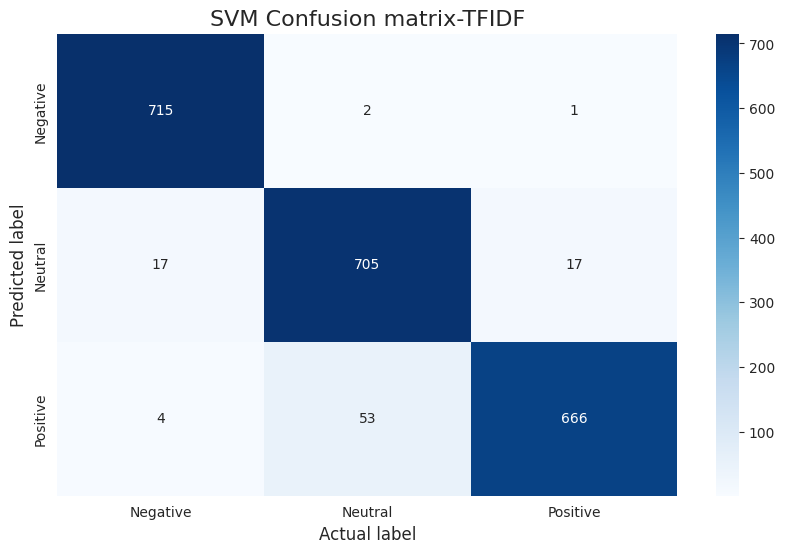

In [98]:
svm_cm = confusion_matrix(y_test,svm_prediction)

# plot confusion matrix 
plt.figure(figsize=(10,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(svm_cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('SVM Confusion matrix-TFIDF', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

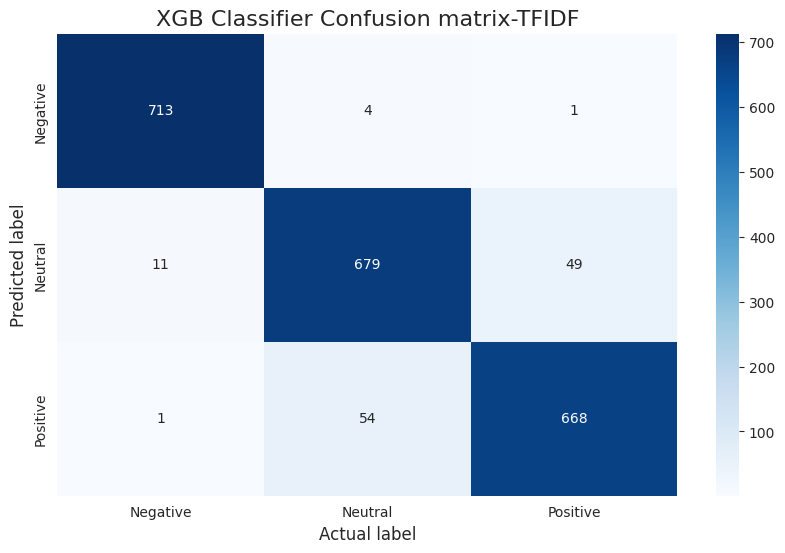

In [99]:
xgbc_cm = confusion_matrix(y_test,xgb_prediction)

# plot confusion matrix 
plt.figure(figsize=(10,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(xgbc_cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('XGB Classifier Confusion matrix-TFIDF', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

# **User Tweet Sentiment Prediction**

In [100]:
text = input("Enter the tweet you want to analyze: ")

Enter the tweet you want to analyze: Hello this airline is good not bad


In [101]:
vector = preprocessUserTweet(text)
output = model.predict(vector.toarray())
print(output)
if(output[0] == 0):
    print("negative")
elif(output[0] == 1):
    print("neutral")
else:
    print("positive")

[2]
positive


In [102]:
# save the model to disk
import joblib
joblib.dump(model, 'model.sav')

['model.sav']